In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#setting seaborn
sns.set()


In [ ]:
tickers = ['XLB', 'XLC', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLRE', 'XLU', 'XLV', 'XLY']

#define etf object
etf = yf.Tickers(tickers)

#download etf data start = 2011-01-01, actions=False to avoid dividends
etf_data = etf.download(start='2011-01-01', actions=False)


In [5]:
#keep only close price
etf_data = etf_data['Close']
#drop Close level
etf_data.columns = etf_data.columns.droplevel(0)
etf_data

,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
Date,,,,,,,,,,,
2011-01-03,29.541876,NaN,44.141159,10.376832,27.269770,21.118046,20.719328,NaN,20.057364,25.510994,32.104485
2011-01-04,29.343508,NaN,43.762402,10.364105,27.230947,21.200970,20.662853,NaN,20.152899,25.591246,31.926365
2011-01-05,29.412197,NaN,43.935749,10.485059,27.370722,21.325336,20.669909,NaN,20.025513,25.647417,32.189297
2011-01-06,29.259590,NaN,43.518482,10.415034,27.324123,21.449717,20.599314,NaN,20.044619,25.751747,31.994215
2011-01-07,29.229069,NaN,43.833038,10.325907,27.378477,21.350216,20.493418,NaN,20.114689,25.735693,31.977249
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-29,85.540001,72.660004,83.839996,37.599998,113.989998,192.479996,72.029999,40.060001,63.330002,136.380005,178.809998
2024-01-02,85.389999,72.250000,84.739998,37.759998,112.839996,187.440002,72.839996,40.430000,64.250000,138.779999,177.149994
2024-01-03,84.470001,71.980003,86.120003,37.439999,111.160004,185.529999,72.269997,39.470001,64.489998,138.550003,173.570007


In [6]:
#calculate daily returns
etf_returns = etf_data.pct_change().fillna(0)
#calc expected returns 
etf_expected_returns = etf_returns.mean() * 252
#calc covariance matrix
etf_cov_matrix = etf_returns.cov() * 252

etf_cov_matrix

,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
XLB,0.044045,0.016704,0.043139,0.039051,0.036656,0.033274,0.019471,0.019122,0.019731,0.024845,0.032403
XLC,0.016704,0.024974,0.016508,0.017932,0.016519,0.024156,0.010174,0.015204,0.010516,0.012948,0.021436
XLE,0.043139,0.016508,0.080211,0.044856,0.039918,0.031848,0.018783,0.019109,0.019904,0.024760,0.031560
XLF,0.039051,0.017932,0.044856,0.049974,0.038674,0.034352,0.020678,0.020149,0.020360,0.026629,0.034344
XLI,0.036656,0.016519,0.039918,0.038674,0.038466,0.032405,0.019463,0.019076,0.019700,0.024411,0.031933
XLK,0.033274,0.024156,0.031848,0.034352,0.032405,0.045847,0.019601,0.020078,0.018229,0.026070,0.036978
XLP,0.019471,0.010174,0.018783,0.020678,0.019463,0.019601,0.019801,0.014283,0.018033,0.017142,0.018483
XLRE,0.019122,0.015204,0.019109,0.020149,0.019076,0.020078,0.014283,0.028966,0.020042,0.014943,0.019220
XLU,0.019731,0.010516,0.019904,0.020360,0.019700,0.018229,0.018033,0.020042,0.032094,0.017030,0.017233
XLV,0.024845,0.012948,0.024760,0.026629,0.024411,0.026070,0.017142,0.014943,0.017030,0.027256,0.023616


In [7]:
#generate black list for portfolio ret
p_returns = []
p_volatility = []
#number of assets
num_assets = len(tickers)
#number of portfolios
num_portfolios = 100000

#use for loops to perform simulation 
for portfolio in range(num_portfolios):
    #generate random weights 임의 투자 가중치 배분 
    weights = np.random.random(num_assets)
    #normalize weights 
    weights /= np.sum(weights)
    #calculate portfolio return 포트폴리오 수익률과 변동성 계산
    returns = np.dot(weights, etf_expected_returns)
    #calculate portfolio volatility
    volatility = np.sqrt(np.dot(weights.T, np.dot(etf_cov_matrix, weights)))
    #append to list
    p_returns.append(returns)
    p_volatility.append(volatility)


In [9]:
#convert to numpy array
p_returns = np.array(p_returns)
p_volatility = np.array(p_volatility)

type(p_returns)


numpy.ndarray

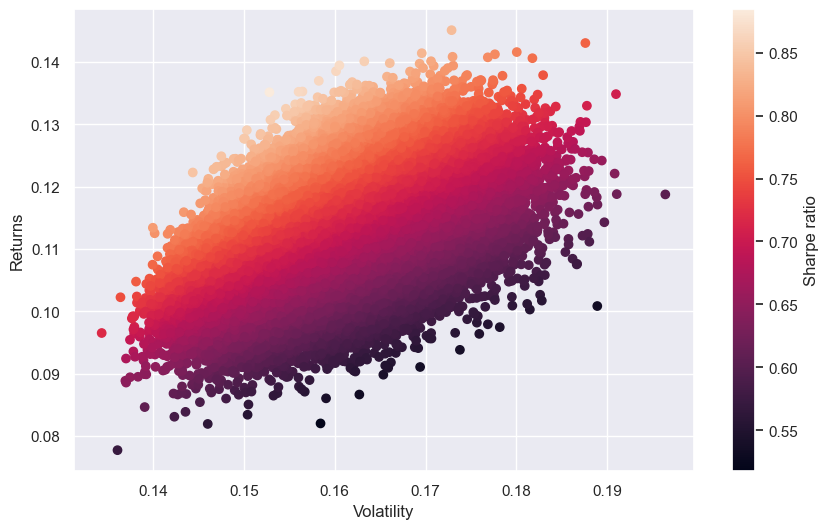

In [10]:
#Using scatter plot to visualize the efficient frontier
plt.figure(figsize=(10, 6))
plt.scatter(p_volatility, p_returns, c=p_returns / p_volatility, marker='o')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar(label='Sharpe ratio')
plt.show()

시뮬레이션을 사용했지만 optimize 를 사용하면 더 효율적임 

In [11]:
import scipy.optimize as sco
#sco는 scipy.optimize의 약자

#define function to cacalculate portfolio statistics

def statistics(weights):
    #invest weights
    weights = np.array(weights)
    #portfolio returns
    port_returns = np.dot(weights, etf_expected_returns)
    #portfolio volatility
    port_volatility = np.sqrt(np.dot(weights.T, np.dot(etf_cov_matrix, weights)))
    #portfolio sharpe ratio
    sharpe_ratio = port_returns / port_volatility
    return np.array([port_returns, port_volatility, sharpe_ratio])

In [13]:
#create random number to create random weights
weights = np.random.random(num_assets)
weights /= np.sum(weights)

np.sum(weights)

1.0

In [14]:
#define objective function funciton
#objective function is the function to minimize
def objective_function(weights):
    return statistics(weights)[1]


In [25]:
#optimzie portfolio based on the linspace
#linspace is the function to create evenly spaced numbers

trets = np.linspace(0.0, 0.2, 50)
tvols = []

#use for loop to obtain the volatility level for each return level 
for tret in trets:
    #initilize the weight = equal weight
    init_guess = np.repeat(1 / num_assets, num_assets)
    #constraint: portfolio objective return, cash holdings =0
    cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
            {'type': 'eq', 'fun': lambda x: statistics(x)[0] - tret})
    #set the bounds for each weight (no shorting)
    bnds = tuple((0, 1) for x in range(num_assets))
    #optimize the portfolio -> use minimize function
    #minimize function is the function to minimize the objective function
    #minimize(objective function, initial guess, constraints, bounds)
    opts = sco.minimize(objective_function, init_guess, method='SLSQP', bounds=bnds, constraints=cons)
    #append the volatility level
    tvols.append(opts['fun'])
    
tvols = np.array(tvols)

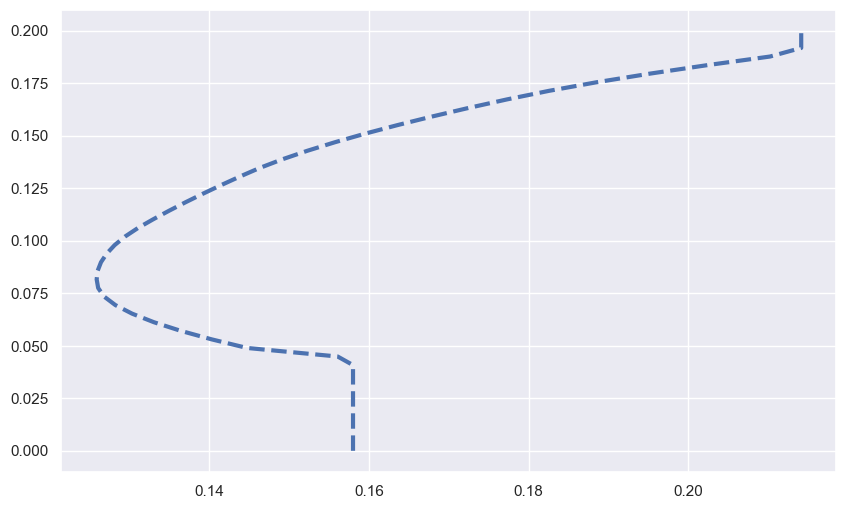

In [26]:
#left side of the efficient frontier
plt.figure(figsize=(10, 6))
plt.plot(tvols, trets, 'b--', linewidth=3.0)
plt.show()


#수직선은 의미가 없는 것 
#밑에애들은 Dominance principle로 날라갈것 

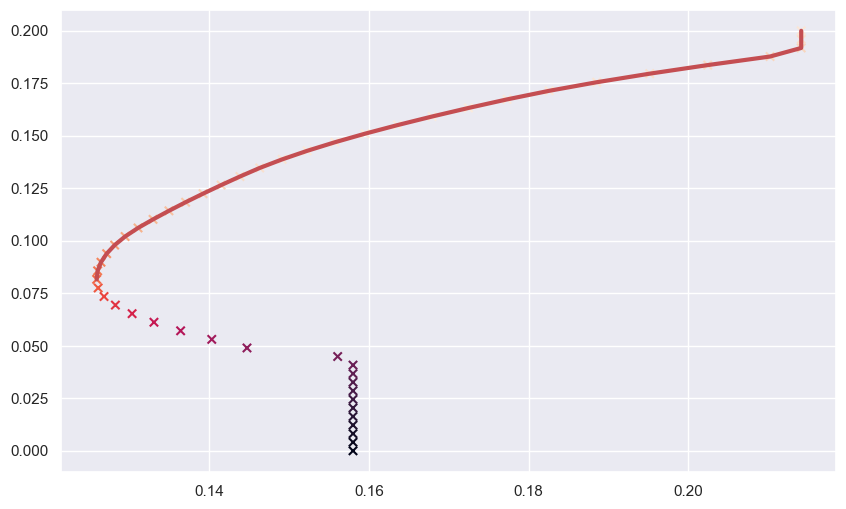

In [30]:
#indicator
ind = np.argmin(tvols)
evols = tvols[ind:]
erets = trets[ind:]

plt.figure(figsize=(10, 6))
plt.scatter(tvols, trets , c=trets / tvols, marker='x')
plt.plot(evols, erets, 'r', linewidth=3.0)
plt.show()
